In [11]:
using Plots, DataFrames, StatsPlots 
using Random, LinearAlgebra, Statistics

ArgumentError: ArgumentError: Package StatsPlots not found in current path:
- Run `import Pkg; Pkg.add("StatsPlots")` to install the StatsPlots package.


In [12]:
using Pkg
Pkg.add("StatsPlots")

 Resolving package versions...
 Installed PDMats ──────── v0.9.10
 Installed StatsPlots ──── v0.12.0
 Installed Widgets ─────── v0.6.2
 Installed FillArrays ──── v0.7.0
 Installed Parameters ──── v0.12.0
 Installed Distributions ─ v0.21.1
 Installed Optim ───────── v0.19.3
  Updating `~/.julia/environments/v1.2/Project.toml`
  [f3b207a7] + StatsPlots v0.12.0
  Updating `~/.julia/environments/v1.2/Manifest.toml`
  [621f4979] + AbstractFFTs v0.4.1
  [7d9fca2a] + Arpack v0.3.1
  [4fba245c] + ArrayInterface v1.2.1
  [13072b0f] + AxisAlgorithms v1.0.0
  [9e28174c] + BinDeps v0.8.10
  [49dc2e85] + Calculus v0.5.0
  [aaaa29a8] + Clustering v0.13.3
  [bbf7d656] + CommonSubexpressions v0.2.0
  [e7dc6d0d] + DataValues v0.4.12
  [01453d9d] + DiffEqDiffTools v1.3.0
  [163ba53b] + DiffResults v0.0.4
  [b552c78f] + DiffRules v0.0.10
  [b4f34e82] + Distances v0.8.2
  [31c24e10] + Distributions v0.21.1
  [7a1cc6ca] + FFTW v0.3.0
  [1a297f60] + FillArrays v0.7.0
  [f6369f11] + ForwardDiff v0.10.3
  [a9

In [9]:
# load data
crime = readtable("crime.csv")

,County,Year,Population,Index_Count,Index_Rate,Violent_Count,Violent_Rate
,String⍰,Int64⍰,Int64⍰,Int64⍰,Float64⍰,Int64⍰,Float64⍰
1,Albany,2015,308613,8224,2664.8,1005,325.7
2,Albany,2014,308166,9157,2971.5,995,322.9
3,Albany,2013,306300,9455,3086.8,1002,327.1
4,Albany,2012,305204,9971,3267.0,1012,331.6
5,Albany,2011,305571,10725,3509.8,1163,380.6
6,Albany,2010,295267,11036,3737.6,1182,400.3
7,Albany,2009,298400,10613,3556.6,1289,432.0
8,Albany,2008,299789,10750,3585.9,1356,452.3
9,Albany,2007,297154,10584,3561.8,1468,494.0


First, let's see what the data look like.

In [10]:
# plot(crime,x=:Year,y=:Index_Rate,color=:County,Geom.line)
@df crime plot(:Year, :Index_Rate, group=:County)

LoadError: UndefVarError: @df not defined

Looks like some counties didn't report their data every year - especially, the large ones.

In [4]:
nonreporting_counties = Set((crime[:County])[crime[:Index_Count].>1e5])

Set(String["Queens", "New York", "Bronx", "Kings"])

Let's check that assumption. Which counties didn't report their data all years?

In [5]:
counties = Set((crime[:County]))
reporting_counties = String[]
nonreporting_counties = String[]

for county in counties
    # println("$county reported for $(length(crime[crime[:County].==county,:County])) years.")
    if length(crime[crime[:County].==county,:County]) == 26
        push!(reporting_counties, county)
    else
        push!(nonreporting_counties, county)
    end
end
nonreporting_counties

7-element Array{String,1}:
 "Kings"       
 "New York"    
 "St Lawrence" 
 "Richmond"    
 "Queens"      
 "Bronx"       
 "St. Lawrence"

In [6]:
reported_crime_all_years = Array{Bool}(size(crime,1))
for (i,county) in enumerate(crime[:County])
    reported_crime_all_years[i] = ~(county in nonreporting_counties)
end

Let's delete data from the counties that didn't always report it.

In [7]:
crime = crime[reported_crime_all_years,:]

,County,Year,Population,Index_Count,Index_Rate,Violent_Count,Violent_Rate,Property_Count,Property_Rate,Firearm_Count,Firearm_Rate
1,Albany,2015,308613,8224,2664.8,1005,325.7,7219,2339.2,111,36.0
2,Albany,2014,308166,9157,2971.5,995,322.9,8162,2648.6,146,47.4
3,Albany,2013,306300,9455,3086.8,1002,327.1,8453,2759.7,150,49.0
4,Albany,2012,305204,9971,3267.0,1012,331.6,8959,2935.4,137,44.9
5,Albany,2011,305571,10725,3509.8,1163,380.6,9562,3129.2,196,64.1
6,Albany,2010,295267,11036,3737.6,1182,400.3,9854,3337.3,154,52.2
7,Albany,2009,298400,10613,3556.6,1289,432.0,9324,3124.7,191,64.0
8,Albany,2008,299789,10750,3585.9,1356,452.3,9394,3133.5,238,79.4
9,Albany,2007,297154,10584,3561.8,1468,494.0,9116,3067.8,208,70.0
10,Albany,2006,298210,11935,4002.2,1545,518.1,10390,3484.1,200,67.1


Let's see what this cleaner data set looks like.

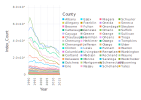

In [8]:
plot(crime,x=:Year,y=:Index_Count,color=:County,Geom.line)

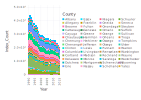

In [9]:
plot(crime,x=:Year,y=:Index_Count,color=:County,Geom.bar, Coord.cartesian(xmin=1990, xmax=2015, ymin=0, ymax=5e5))

In [10]:
# just Tompkins county
tompkins = crime[crime[:County].=="Tompkins",:]

,County,Year,Population,Index_Count,Index_Rate,Violent_Count,Violent_Rate,Property_Count,Property_Rate,Firearm_Count,Firearm_Rate
1,Tompkins,2015,105240,2206,2096.2,140,133.0,2066,1963.1,11,10.5
2,Tompkins,2014,104271,2603,2496.4,103,98.8,2500,2397.6,11,10.5
3,Tompkins,2013,102977,2902,2818.1,109,105.8,2793,2712.3,16,15.5
4,Tompkins,2012,102272,2746,2685.0,116,113.4,2630,2571.6,14,13.7
5,Tompkins,2011,102020,2388,2340.7,90,88.2,2298,2252.5,9,8.8
6,Tompkins,2010,101158,2505,2476.3,120,118.6,2385,2357.7,14,13.8
7,Tompkins,2009,101616,2558,2517.3,153,150.6,2405,2366.8,13,12.8
8,Tompkins,2008,101591,2475,2436.2,137,134.9,2338,2301.4,20,19.7
9,Tompkins,2007,100687,2452,2435.3,116,115.2,2336,2320.1,8,7.9
10,Tompkins,2006,100286,2720,2712.2,147,146.6,2573,2565.7,10,10.0


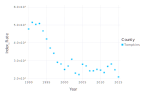

  likely near /opt/julia_packages/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /opt/julia_packages/.julia/v0.6/IJulia/src/kernel.jl:31
in render at /home/juser/.julia/v0.6/Gadfly/src/geom/point.jl


In [11]:
plot(tompkins,x=:Year,y=:Index_Rate,color=:County,Geom.point)